In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import os
import json

kaggle_json_path = 'config/kaggle.json'

### Loading the DataFrame

In [6]:
with open(kaggle_json_path) as f:
    kaggle_data = json.load(f)

os.makedirs(os.path.join(os.path.expanduser('~'), '.kaggle'), exist_ok=True)

with open(os.path.join(os.path.expanduser('~'), '.kaggle', 'kaggle.json'), 'w') as f:
    json.dump(kaggle_data, f)

os.chmod(os.path.join(os.path.expanduser('~'), '.kaggle', 'kaggle.json'), 0o600)

In [7]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown




  0%|          | 0.00/211k [00:00<?, ?B/s]
100%|██████████| 211k/211k [00:00<00:00, 227kB/s]
100%|██████████| 211k/211k [00:00<00:00, 225kB/s]


In [8]:
import zipfile

with zipfile.ZipFile('sms-spam-collection-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('sms-spam-collection-dataset')

In [148]:
path= 'sms-spam-collection-dataset/spam.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

In [149]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Performing EDA

In [150]:
df= df.iloc[:, :2]

In [151]:
df.shape

(5572, 2)

In [152]:
df.duplicated().sum()

403

In [153]:
df.drop_duplicates(inplace=True)
df.shape

(5169, 2)

In [154]:
df.rename(columns={'v1':'class', 'v2':'message'},inplace=True)
df.sample(5)

,class,message
1356,ham,U ned to convince him tht its not possible wit...
5556,ham,Yes i have. So that's why u texted. Pshew...mi...
25,ham,Just forced myself to eat a slice. I'm really ...
2895,spam,pdate_Now - Double mins and 1000 txts on Orang...
836,spam,Do you want 750 anytime any network mins 150 t...


In [155]:
# Perfroming Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [156]:
df['class']= encoder.fit_transform(df['class'])

In [157]:
df['class'].value_counts()

class
0    4516
1     653
Name: count, dtype: int64

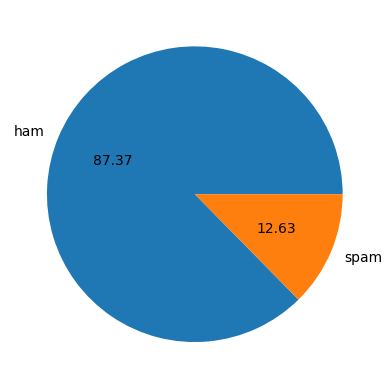

In [158]:
plt.pie(df['class'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [159]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\klper\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [160]:
df['chars']= df['message'].apply(len)
df.head()

,class,message,chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [161]:
df['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [162]:
df['words']= df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['sentence']= df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [163]:
df.head()

,class,message,chars,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [164]:
df.describe()

,class,chars,words,sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [165]:
ham_df= df[df['class']==0]
spam_df= df[df['class']==1]

In [166]:
# For ham message
ham_df[['chars', 'words', 'sentence']].describe()

,chars,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [167]:
# For spam message
spam_df[['chars', 'words', 'sentence']].describe()

,chars,words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


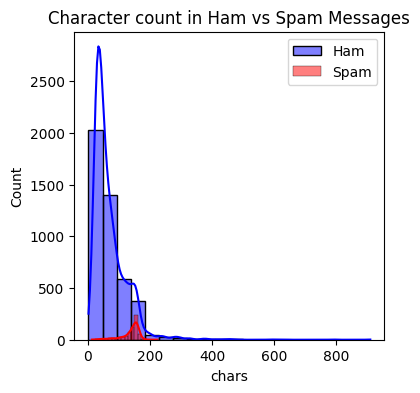

In [168]:
plt.figure(figsize= (4,4))
sns.histplot(ham_df['chars'], bins=20, kde=True, color='blue', label='Ham')
sns.histplot(spam_df['chars'], bins=20, kde=True, color='red', label='Spam')
plt.title('Character count in Ham vs Spam Messages')
plt.legend()
plt.show()

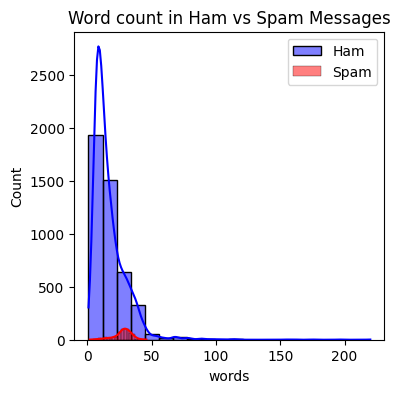

In [169]:
plt.figure(figsize= (4,4))
sns.histplot(ham_df['words'], bins=20, kde=True, color='blue', label='Ham')
sns.histplot(spam_df['words'], bins=20, kde=True, color='red', label='Spam')
plt.title('Word count in Ham vs Spam Messages')
plt.legend()
plt.show()

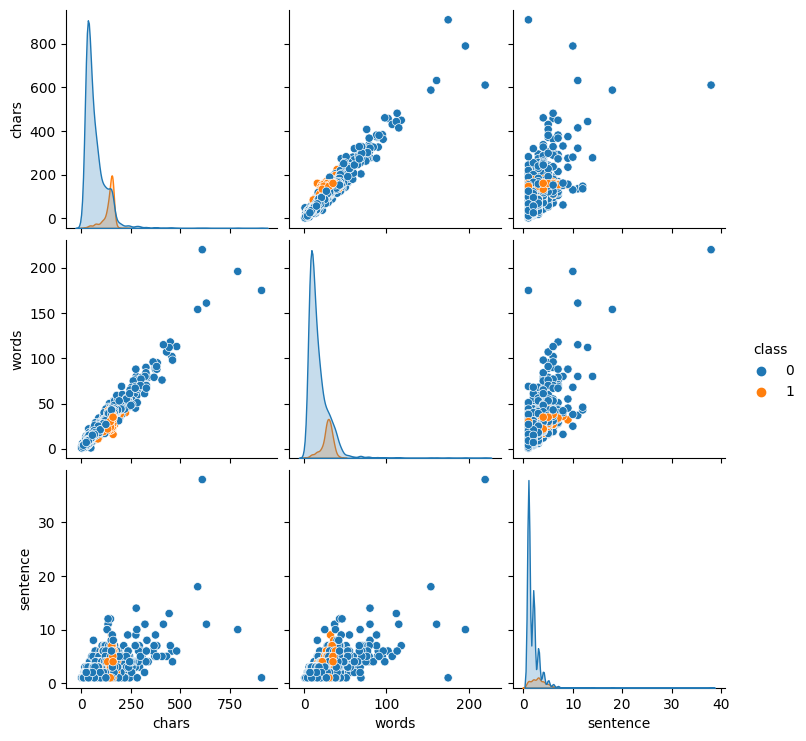

In [170]:
sns.pairplot(df,hue='class')

### Perfroming Text Cleaning
    Data Preprocessing

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   class     5169 non-null   int32 
 1   message   5169 non-null   object
 2   chars     5169 non-null   int64 
 3   words     5169 non-null   int64 
 4   sentence  5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [191]:
# Remove HTML tags if present
import re
def rem_html(text):
    pattern= re.compile('<.*?>')
    return pattern.sub(r'',text)

df['new_msg']= df['message'].apply(rem_html)

In [192]:
# Remove Punctuations
import string
exclude= string.punctuation

def rem_punc(text):
    return re.sub(r'[^\w\s]', '', text)

df['new_msg']= df['new_msg'].apply(rem_punc)

In [193]:
# Converting to Lower case
df['new_msg']= df['new_msg'].str.lower()

In [194]:
# Remove Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words= set(stopwords.words('english'))
def rem_stopwords(text):
    words= nltk.word_tokenize(text)
    temp= [word for word in words if word not in stop_words]
    return " ".join(temp)

df['new_msg']= df['new_msg'].apply(rem_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\klper\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [195]:
# Performing Stemming
from nltk.stem.porter import PorterStemmer

ps= PorterStemmer()
def stem_words(text):
    return " ".join([ps.stem(word) for word in text.split()])

df['new_msg']= df['new_msg'].apply(stem_words)

In [197]:
df.head()

,class,message,chars,words,sentence,new_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think goe usf live around though


In [198]:
ham_df= df[df['class']==0]
spam_df= df[df['class']==1]

    WordCloud

In [201]:
from wordcloud import WordCloud
wc= WordCloud()

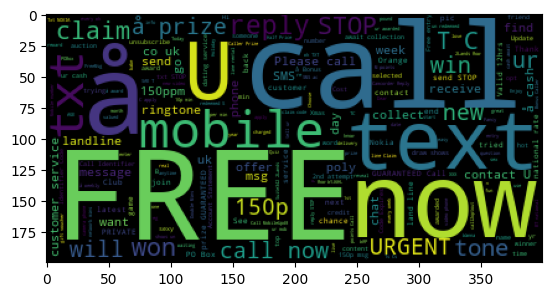

In [202]:
spam_wc= wc.generate(spam_df['message'].str.cat(sep=" "))
plt.imshow(spam_wc)

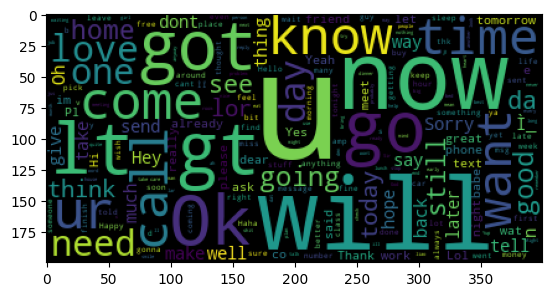

In [203]:
ham_wc= wc.generate(ham_df['message'].str.cat(sep=" "))
plt.imshow(ham_wc)

### Model Building

In [204]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

In [211]:
X= cv.fit_transform(df['new_msg']).toarray()

In [212]:
X.shape

(5169, 8061)

In [214]:
Y= df['class'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [224]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y, random_state=2,test_size=0.25)

#### Naive Bayes

In [227]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [230]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred1))
print("Precision Score: ", precision_score(y_test,y_pred1))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred1))

Accuracy Score:  0.8778035576179428
Precision Score:  0.5090252707581228
Confusion Matrix: 
 [[994 136]
 [ 22 141]]


In [231]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred2))
print("Precision Score: ", precision_score(y_test,y_pred2))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred2))

Accuracy Score:  0.9659706109822119
Precision Score:  0.8324022346368715
Confusion Matrix: 
 [[1100   30]
 [  14  149]]


In [232]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print("Accuracy Score: ", accuracy_score(y_test,y_pred3))
print("Precision Score: ", precision_score(y_test,y_pred3))
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred3))

Accuracy Score:  0.9675174013921114
Precision Score:  0.9689922480620154
Confusion Matrix: 
 [[1126    4]
 [  38  125]]
